<a href="https://colab.research.google.com/github/ncrowder/python/blob/main/PA_5_2_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [33]:
# Load dataset (example: red wine)
url_red = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_df = pd.read_csv(url_red, sep=';')

wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [34]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


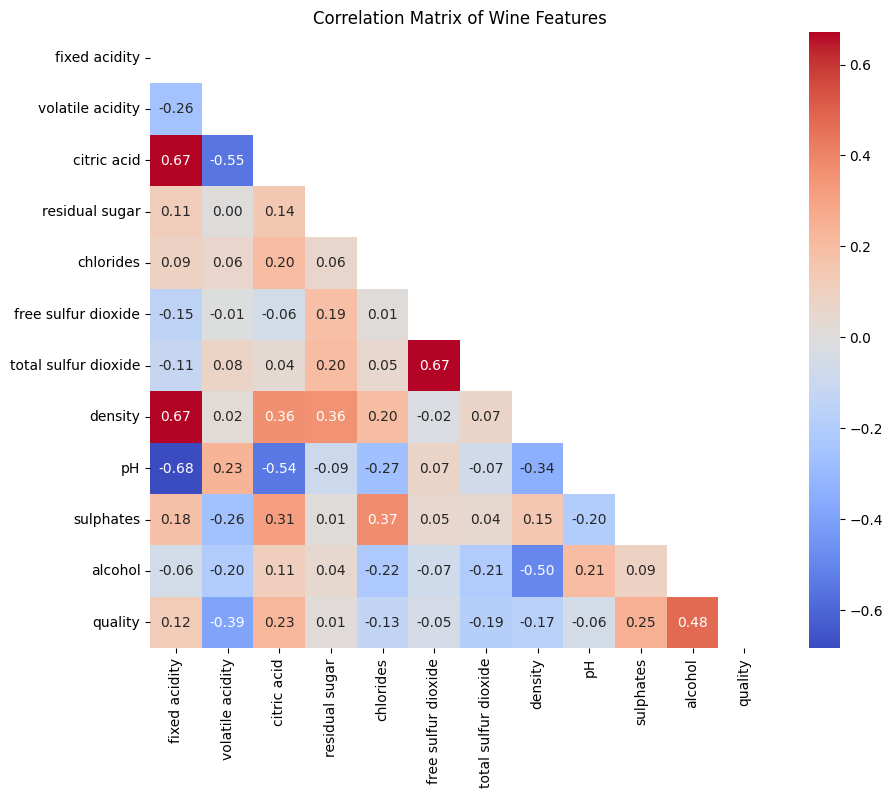

In [35]:
corr = wine_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Wine Features")
plt.show()

In [36]:
corr_matrix = wine_df.corr().abs()
high_corr_pairs = [(f1, f2) for f1 in wine_df.columns for f2 in wine_df.columns if f1 != f2 and corr_matrix.loc[f1,f2] > 0.6]
high_corr_pairs

[('fixed acidity', 'citric acid'),
 ('fixed acidity', 'density'),
 ('fixed acidity', 'pH'),
 ('citric acid', 'fixed acidity'),
 ('free sulfur dioxide', 'total sulfur dioxide'),
 ('total sulfur dioxide', 'free sulfur dioxide'),
 ('density', 'fixed acidity'),
 ('pH', 'fixed acidity')]

In [37]:
features = wine_df.columns.drop('quality')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(wine_df[features])

In [38]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [39]:
X_pca.shape

(1599, 11)

In [40]:
X_pca[0,:2] # approximation of the first data point in reduced 2d space using only the primary direction of variation

array([-1.61952988,  0.45095009])

In [41]:
X_pca[0,:3] # approximation of the first data point in reduced 3d space using only the primary direction of variation

array([-1.61952988,  0.45095009, -1.77445415])

In [42]:
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(len(features))],
                        index=features)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
fixed acidity,0.489314,-0.110503,-0.123302,-0.229617,-0.082614,-0.101479,0.350227,0.177595,0.194021,-0.249523,0.639691
volatile acidity,-0.238584,0.274930,-0.449963,0.078960,0.218735,-0.411449,0.533735,0.078775,-0.129110,0.365925,0.002389
citric acid,0.463632,-0.151791,0.238247,-0.079418,-0.058573,-0.069593,-0.105497,0.377516,-0.381450,0.621677,-0.070910
residual sugar,0.146107,0.272080,0.101283,-0.372793,0.732144,-0.049156,-0.290663,-0.299845,0.007523,0.092872,0.184030
chlorides,0.212247,0.148052,-0.092614,0.666195,0.246501,-0.304339,-0.370413,0.357009,0.111339,-0.217671,0.053065
free sulfur dioxide,-0.036158,0.513567,0.428793,-0.043538,-0.159152,0.014000,0.116596,0.204781,0.635405,0.248483,-0.051421
total sulfur dioxide,0.023575,0.569487,0.322415,-0.034577,-0.222465,-0.136308,0.093662,-0.019036,-0.592116,-0.370750,0.068702
density,0.395353,0.233575,-0.338871,-0.174500,0.157077,0.391152,0.170481,0.239223,0.020719,-0.239990,-0.567332
pH,-0.438520,0.006711,0.057697,-0.003788,0.267530,0.522116,0.025138,0.561391,-0.167746,-0.010970,0.340711
sulphates,0.242921,-0.037554,0.279786,0.550872,0.225962,0.381263,0.447469,-0.374604,-0.058367,0.112320,0.069555


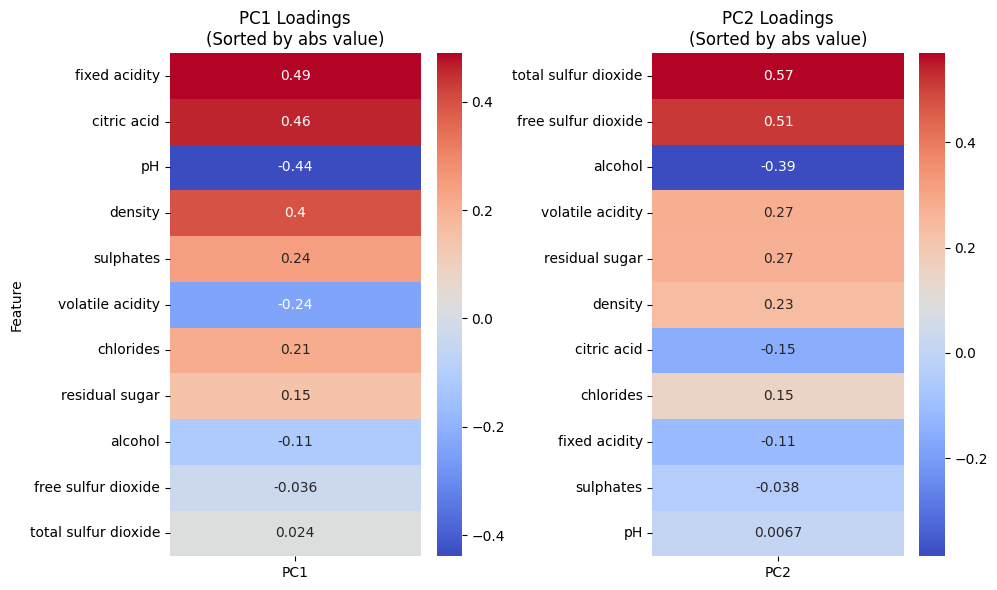

In [43]:
loadings_sorted_PC1 = loadings[['PC1']].assign(abs_val=lambda df: df['PC1'].abs()).sort_values('abs_val',ascending=False)
loadings_sorted_PC2 = loadings[['PC2']].assign(abs_val=lambda df: df['PC2'].abs()).sort_values('abs_val',ascending=False)

# --- Plot side-by-side heatmaps ---
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

sns.heatmap(loadings_sorted_PC1[['PC1']], annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('PC1 Loadings\n(Sorted by abs value)')
axes[0].set_ylabel('Feature')

sns.heatmap(loadings_sorted_PC2[['PC2']], annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('PC2 Loadings\n(Sorted by abs value)')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [44]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
variance_df = pd.DataFrame([explained_variance,cumulative_variance]).T.rename(columns = {0:'Explained_Var',1:"Cumulative_Explained_Var"})

In [45]:
variance_df

,Explained_Var,Cumulative_Explained_Var
0,0.281739,0.281739
1,0.175083,0.456822
2,0.140958,0.597781
3,0.110294,0.708074
4,0.087208,0.795283
5,0.059964,0.855247
6,0.053072,0.908319
7,0.038451,0.946770
8,0.031331,0.978101
9,0.016485,0.994586


<Axes: >

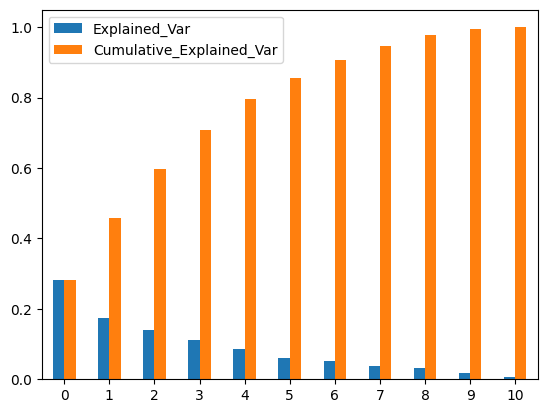

In [46]:
variance_df.plot(kind='bar',rot=0)

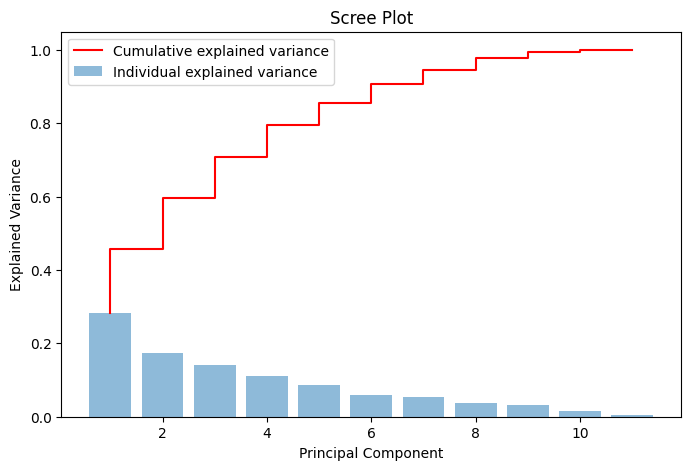

In [47]:
plt.figure(figsize=(8,5))
plt.bar(range(1,len(explained_variance)+1), explained_variance, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1,len(cumulative_variance)+1), cumulative_variance,
         label='Cumulative explained variance', color='red')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.show()

### Is PCA useful for any predictions in the wine dataset?

In [48]:
pca_df = pd.DataFrame(X_pca[:, :2], columns=['PC1', 'PC2'])
pca_df['quality'] = wine_df['quality']

In [49]:
pca_df

,PC1,PC2,quality
0,-1.619530,0.450950,5
1,-0.799170,1.856553,5
2,-0.748479,0.882039,5
3,2.357673,-0.269976,6
4,-1.619530,0.450950,5
...,...,...,...
1594,-2.150500,0.814286,5
1595,-2.214496,0.893101,6
1596,-1.456129,0.311746,6
1597,-2.270518,0.979791,5


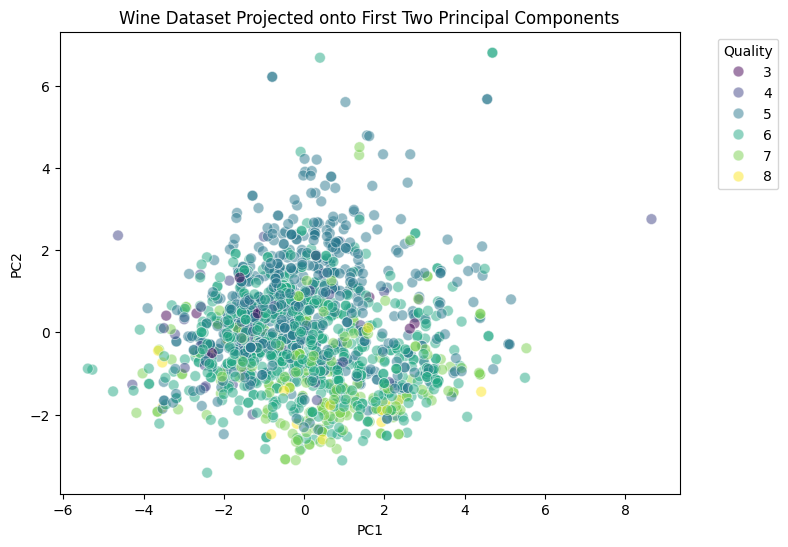

In [50]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='quality', palette='viridis', s=60, alpha = .5)
plt.title('Wine Dataset Projected onto First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [51]:
corr_quality = wine_df.corr()['quality']
corr_quality.abs().sort_values(ascending=False)

,quality
quality,1.000000
alcohol,0.476166
volatile acidity,0.390558
sulphates,0.251397
citric acid,0.226373
total sulfur dioxide,0.185100
density,0.174919
chlorides,0.128907
fixed acidity,0.124052
pH,0.057731


### Attempt to Predict Density by using Linear Regression after PCA

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [53]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [54]:
y = wine_df.density
X = wine_df.drop(columns=['density','quality'])

In [63]:
corr_quality = wine_df.corr()['density']
corr_quality.abs().sort_values(ascending=False)

,density
density,1.000000
fixed acidity,0.668047
alcohol,0.496180
citric acid,0.364947
residual sugar,0.355283
pH,0.341699
chlorides,0.200632
quality,0.174919
sulphates,0.148506
total sulfur dioxide,0.071269


In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

In [65]:
model_full = LinearRegression()
model_full.fit(X_train, y_train)

y_pred_full = model_full.predict(X_test)
r2_full = r2_score(y_test, y_pred_full)

print("R² using all 10 features:", r2_full)

R² using all 10 features: 0.8690129184546863


In [66]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [67]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

In [68]:
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

y_pred_pca = model_pca.predict(X_test_pca)
r2_pca = r2_score(y_test, y_pred_pca)

print("R² using 5 PCA components:", r2_pca)

R² using 5 PCA components: 0.5361994447415128


In [71]:
pca.components_.T

array([[ 0.48690059, -0.0774277 , -0.12831541, -0.33510986,  0.0053315 ],
       [-0.32945922,  0.13445416, -0.46747343, -0.04051325,  0.31468977],
       [ 0.52916457, -0.01741528,  0.1638412 , -0.08256411, -0.02318656],
       [ 0.09936399,  0.23492612,  0.18574708, -0.25659163,  0.84309003],
       [ 0.2209808 ,  0.20873   , -0.36945046,  0.55822059,  0.25512781],
       [-0.06674455,  0.59498349,  0.31544875, -0.02081999, -0.15762406],
       [-0.01872112,  0.63935561,  0.15473588, -0.09971364, -0.18684432],
       [-0.47142669, -0.0896907 ,  0.26395978,  0.21281687,  0.09245213],
       [ 0.29763528,  0.0990809 ,  0.12273507,  0.65023355,  0.01352946],
       [-0.0053275 , -0.31019806,  0.59914474,  0.15271791,  0.23669966]])

In [72]:
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(5)],
                        index=X.columns)
loadings

,PC1,PC2,PC3,PC4,PC5
fixed acidity,0.486901,-0.077428,-0.128315,-0.335110,0.005332
volatile acidity,-0.329459,0.134454,-0.467473,-0.040513,0.314690
citric acid,0.529165,-0.017415,0.163841,-0.082564,-0.023187
residual sugar,0.099364,0.234926,0.185747,-0.256592,0.843090
chlorides,0.220981,0.208730,-0.369450,0.558221,0.255128
free sulfur dioxide,-0.066745,0.594983,0.315449,-0.020820,-0.157624
total sulfur dioxide,-0.018721,0.639356,0.154736,-0.099714,-0.186844
pH,-0.471427,-0.089691,0.263960,0.212817,0.092452
sulphates,0.297635,0.099081,0.122735,0.650234,0.013529
alcohol,-0.005328,-0.310198,0.599145,0.152718,0.236700


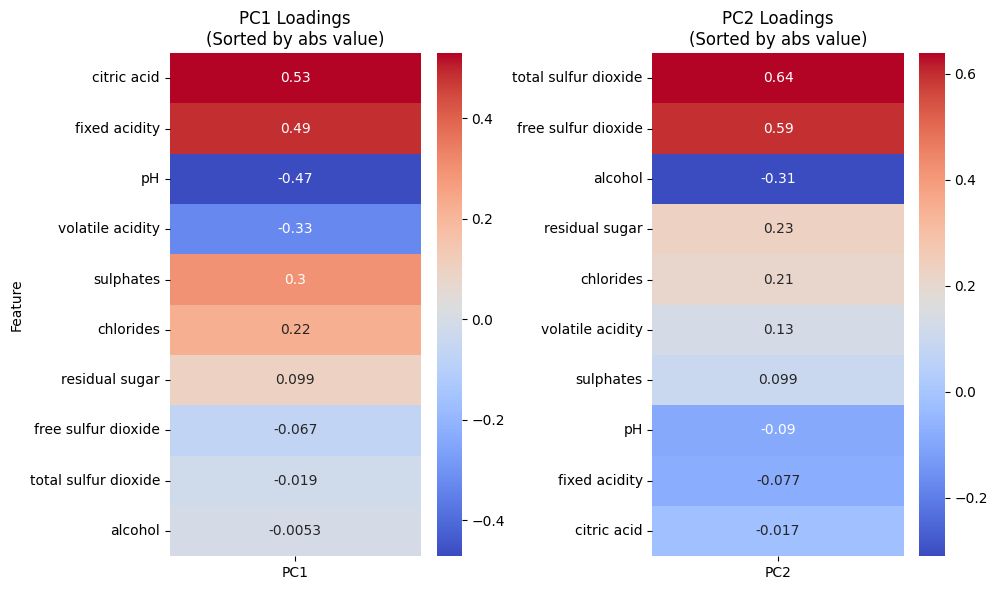

In [73]:
loadings_sorted_PC1 = loadings[['PC1']].assign(abs_val=lambda df: df['PC1'].abs()).sort_values('abs_val',ascending=False)
loadings_sorted_PC2 = loadings[['PC2']].assign(abs_val=lambda df: df['PC2'].abs()).sort_values('abs_val',ascending=False)

# --- Plot side-by-side heatmaps ---
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

sns.heatmap(loadings_sorted_PC1[['PC1']], annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('PC1 Loadings\n(Sorted by abs value)')
axes[0].set_ylabel('Feature')

sns.heatmap(loadings_sorted_PC2[['PC2']], annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('PC2 Loadings\n(Sorted by abs value)')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

### Toy example of regression after PCA resulting in a HIGHER R^2

In [74]:
np.random.seed(42)

n_samples = 200

# 1. Three latent factors
f1 = np.random.normal(0, 1, n_samples)
f2 = np.random.normal(0, 1, n_samples)
f3 = np.random.normal(0, 1, n_samples)
F = np.vstack([f1, f2, f3]).T   # shape: (200, 3)

# 2. Build 30 observed predictors as noisy linear combos of these factors
#    10 features ~ f1, 10 ~ f2, 10 ~ f3
X_list = []
for i in range(10):
    X_list.append(f1 + np.random.normal(0, 0.3, n_samples))
for i in range(10):
    X_list.append(f2 + np.random.normal(0, 0.3, n_samples))
for i in range(10):
    X_list.append(f3 + np.random.normal(0, 0.3, n_samples))

X = np.column_stack(X_list)    # shape: (200, 30)

# 3. Target depends only on the latent factors
y = 3*f1 - 2*f2 + 0.5*f3 + np.random.normal(0, 0.5, n_samples)

# Train/test split (small-ish sample to exacerbate overfitting)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

# ----- A. Plain linear regression with all 30 features -----
model_full = LinearRegression()
model_full.fit(X_train, y_train)

y_pred_full = model_full.predict(X_test)
r2_full = r2_score(y_test, y_pred_full)
print("Test R² with all 30 features:", r2_full)

# ----- B. PCA -> 3 components (should capture f1, f2, f3) -----
pca = PCA(n_components=3, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca  = pca.transform(X_test)

model_pcr = LinearRegression()
model_pcr.fit(X_train_pca, y_train)

y_pred_pcr = model_pcr.predict(X_test_pca)
r2_pcr = r2_score(y_test, y_pred_pcr)
print("Test R² with 3 PCA components:", r2_pcr)

Test R² with all 30 features: 0.9298511139991893
Test R² with 3 PCA components: 0.9609070833068295


#Attempt to cluster IRIS species by using K-Means after PCA

In [75]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

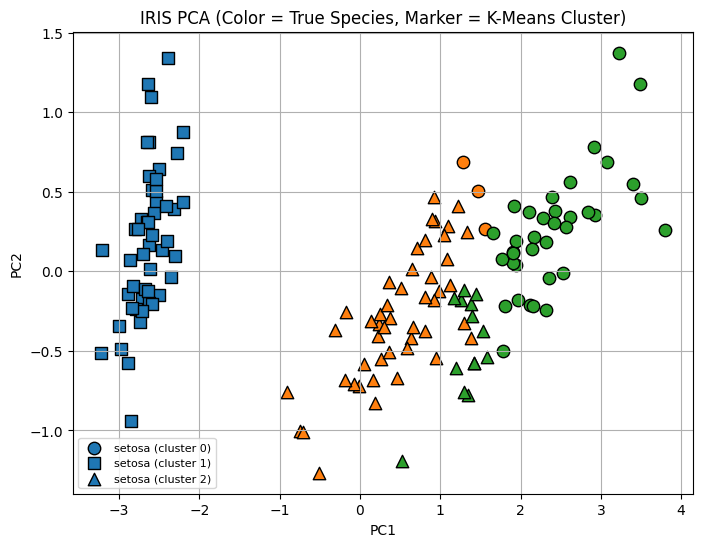

Adjusted Rand Index (ARI): 0.7163421126838476


In [76]:
iris = datasets.load_iris()
X = iris.data
y = iris.target    # true species labels (0,1,2)

species_names = iris.target_names  # ['setosa','versicolor','virginica']

# ----------------------------------------------------------
# 2. PCA (2 components)
# ----------------------------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# ----------------------------------------------------------
# 3. K-means clustering (on PCA data)
# ----------------------------------------------------------
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)   # cluster label 0,1,2

# ----------------------------------------------------------
# 4. Colors for true species
# ----------------------------------------------------------
colors = ['tab:blue', 'tab:orange', 'tab:green']   # consistent colors

# ----------------------------------------------------------
# 5. Marker shapes for clusters
# ----------------------------------------------------------
markers = ['o', 's', '^']  # circle, square, triangle

# ----------------------------------------------------------
# 6. Plotting: PCA scatter with consistent colors + markers
# ----------------------------------------------------------
plt.figure(figsize=(8, 6))

for species in np.unique(y):
    for cluster in np.unique(clusters):
        mask = (y == species) & (clusters == cluster)
        plt.scatter(
            X_pca[mask, 0],
            X_pca[mask, 1],
            c=colors[species],        # color = species
            marker=markers[cluster],  # marker = cluster assignment
            edgecolor='black',
            s=80,
            label=f"{species_names[species]} (cluster {cluster})" if species == 0 else None
        )

plt.title("IRIS PCA (Color = True Species, Marker = K-Means Cluster)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)

# Avoid duplicate legend entries
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
plt.legend(unique.values(), unique.keys(), loc="best", fontsize=8)

plt.show()

# ----------------------------------------------------------
# 7. Calculate ARI score
# ----------------------------------------------------------
ari = adjusted_rand_score(y, clusters)
print("Adjusted Rand Index (ARI):", ari)

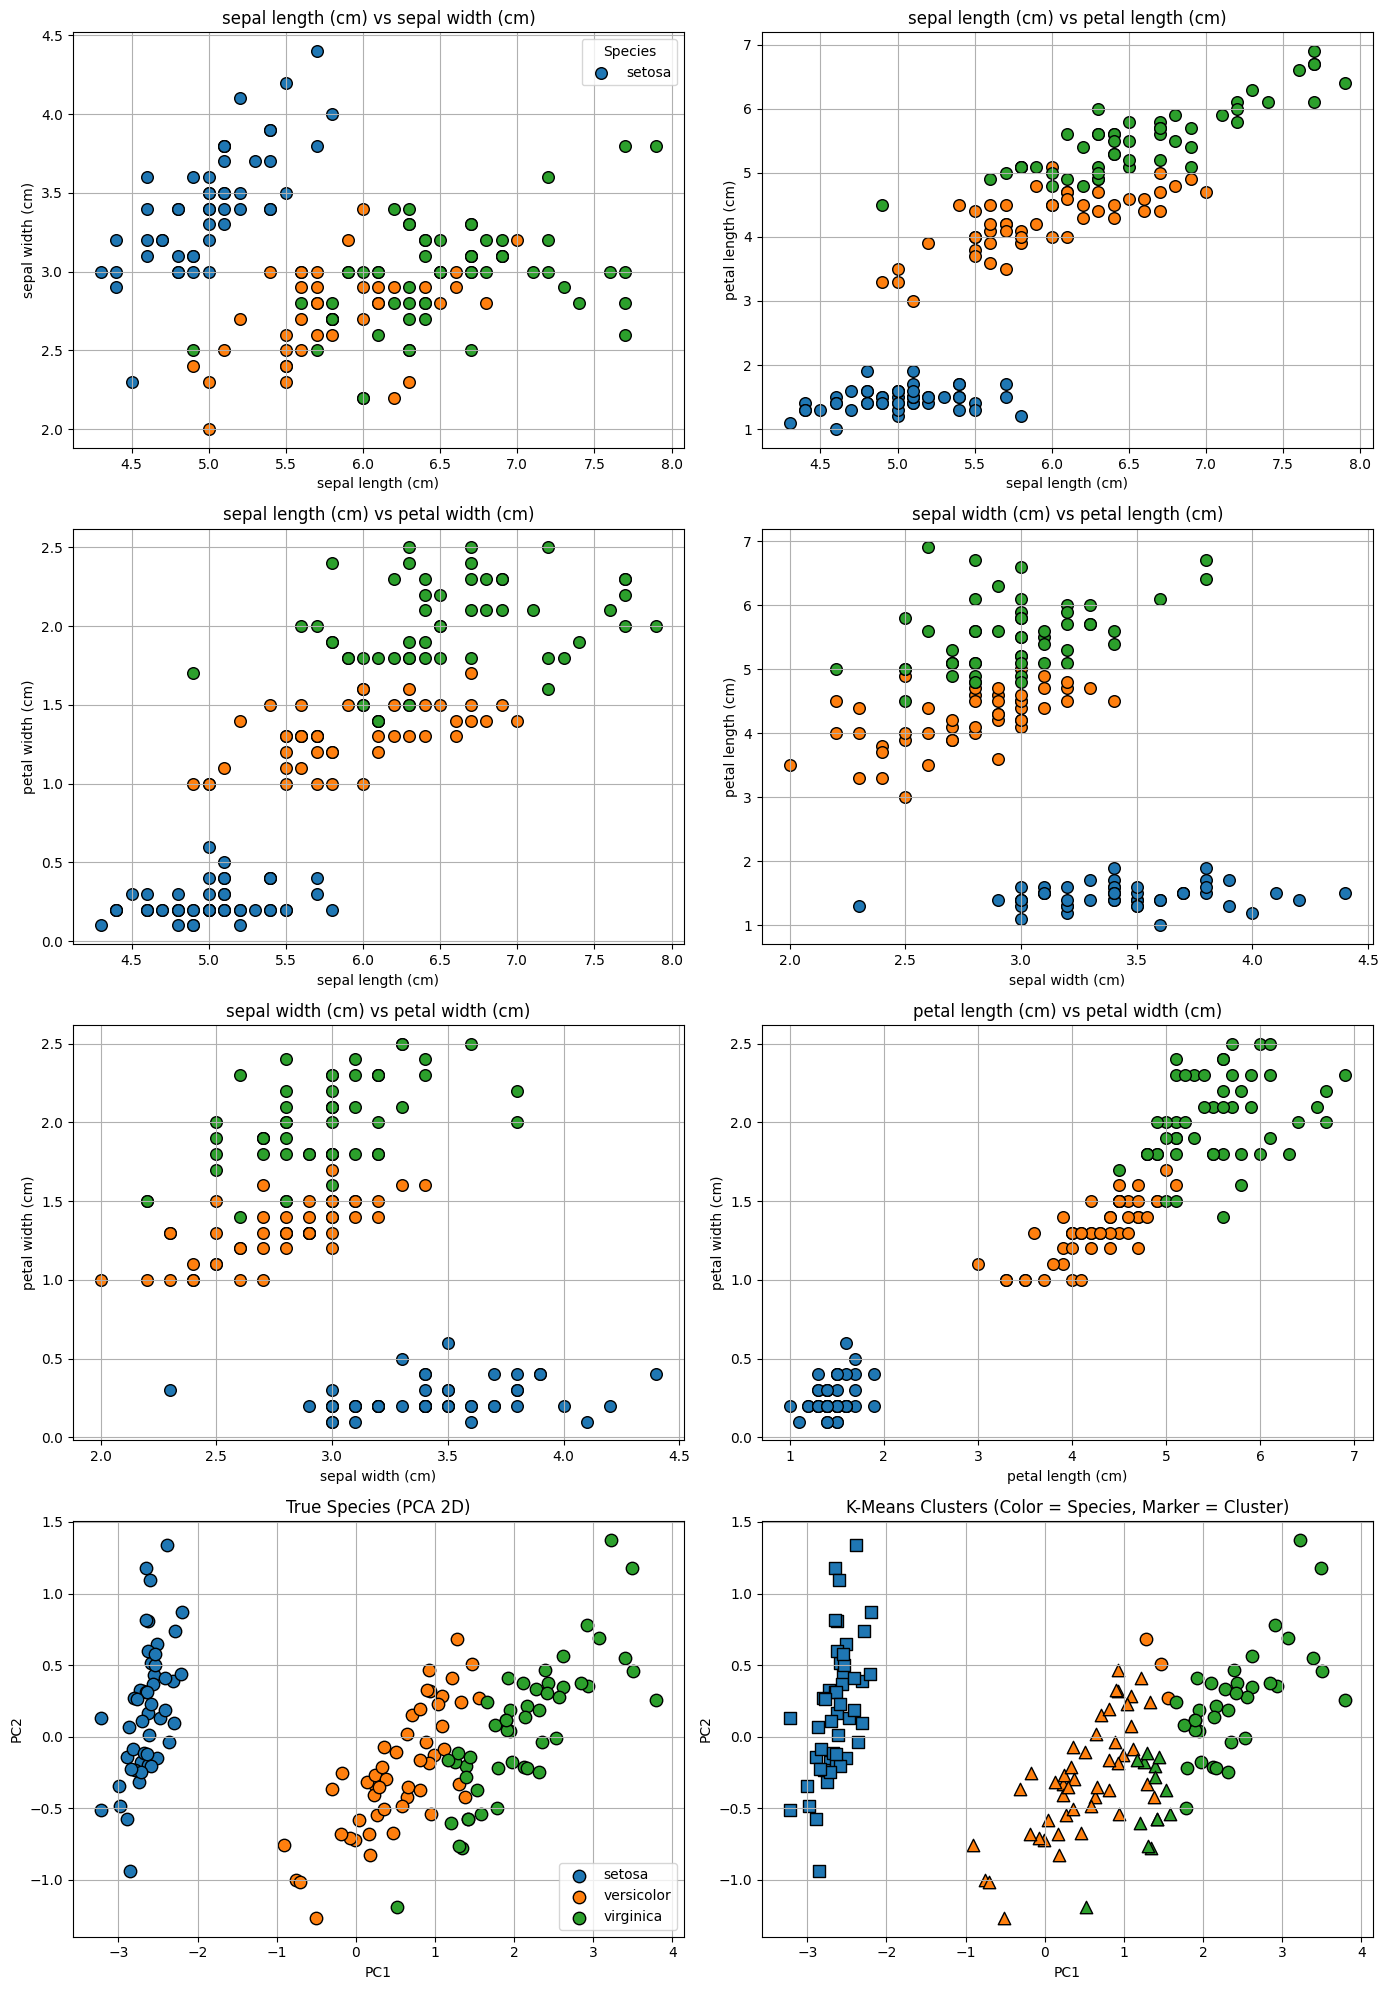

Adjusted Rand Index (ARI): 0.7163421126838476


In [78]:
# ----------------------------------------------------------
# Load IRIS dataset
# ----------------------------------------------------------
iris = datasets.load_iris()
X = iris.data
y = iris.target
features = iris.feature_names
species_names = iris.target_names

# Consistent colors for species
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Marker shapes for clusters
markers = ['o', 's', '^']

# ----------------------------------------------------------
# PCA
# ----------------------------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# K-means in PCA space
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

# ----------------------------------------------------------
# Pairwise feature indices (6 combos)
# ----------------------------------------------------------
pairs = [
    (0,1),  # sepal length vs sepal width
    (0,2),  # sepal length vs petal length
    (0,3),  # sepal length vs petal width
    (1,2),  # sepal width vs petal length
    (1,3),  # sepal width vs petal width
    (2,3)   # petal length vs petal width
]

# ----------------------------------------------------------
# Create 4×2 grid
# ----------------------------------------------------------
fig, ax = plt.subplots(4, 2, figsize=(14, 20))

# ----------------------------------------------------------
# TOP 3 ROWS: the 6 pairwise feature plots
# ----------------------------------------------------------
for i, (f1, f2) in enumerate(pairs):
    row = i // 2
    col = i % 2

    for species in np.unique(y):
        mask = (y == species)
        ax[row, col].scatter(
            X[mask, f1],
            X[mask, f2],
            c=colors[species],
            edgecolor='black',
            label=species_names[species] if col == 0 and row == 0 and species == 0 else None,
            s=70
        )

    ax[row, col].set_xlabel(features[f1])
    ax[row, col].set_ylabel(features[f2])
    ax[row, col].set_title(f"{features[f1]} vs {features[f2]}")
    ax[row, col].grid(True)

# Add legend only once
ax[0,0].legend(title="Species")

# ----------------------------------------------------------
# BOTTOM ROW, LEFT: True species in PCA space
# ----------------------------------------------------------
for species in np.unique(y):
    mask = (y == species)
    ax[3, 0].scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        c=colors[species],
        marker='o',
        edgecolor='black',
        s=80,
        label=species_names[species]
    )

ax[3, 0].set_title("True Species (PCA 2D)")
ax[3, 0].set_xlabel("PC1")
ax[3, 0].set_ylabel("PC2")
ax[3, 0].grid(True)
ax[3, 0].legend()

# ----------------------------------------------------------
# BOTTOM ROW, RIGHT: PCA + K-Means (marker = cluster)
# ----------------------------------------------------------
for species in np.unique(y):
    for cluster in np.unique(clusters):
        mask = (y == species) & (clusters == cluster)
        ax[3, 1].scatter(
            X_pca[mask, 0],
            X_pca[mask, 1],
            c=colors[species],        # color = species
            marker=markers[cluster],  # marker = cluster
            edgecolor='black',
            s=80
        )

ax[3, 1].set_title("K-Means Clusters (Color = Species, Marker = Cluster)")
ax[3, 1].set_xlabel("PC1")
ax[3, 1].set_ylabel("PC2")
ax[3, 1].grid(True)

plt.tight_layout()
plt.show()

# ----------------------------------------------------------
# ARI score
# ----------------------------------------------------------
ari = adjusted_rand_score(y, clusters)
print("Adjusted Rand Index (ARI):", ari)